# Spatial Regression of Abundance Data
Here I show how to extract different taxonomic information at cell level.
Although there exists a method for building the taxonomic tree within a single cell, the process can be computationally intensive because it depends on extracting the total amount of occurrences in each cell. From there, it traverses fromtop to bottom the tree looking for the corresponding nodes.

The approach is usefull when one needs a small number of trees but it'll become increasingly slow if the amount of cells or occurrences increases. 

## Extracting specific taxonomic levels en each cells

The method studied here makes use of the relationship type `IS_IN` stored in the knowledge graph.

Note: *There was a problem with the design of the OGM implementation (py2neo.ogm). The retrieval of linked nodes based on a specific relation does not distinguish different labels. In other words it returns the totality of the data that has the  specific relationship given a node.*

The solution was to include extra methods for the class Cell `has_[taxas]`. This method/attribute returns a graph selector that points to the corresponding nodes.

Let's get started.
As usual we need to load the necessary modules


In [1]:
%matplotlib inline
import sys
sys.path.append('/apps')
import django
django.setup()
from drivers.tree_builder import TreeNeo
from drivers.graph_models import TreeNode, Order, Family, graph,Kingdom,Occurrence
from drivers.graph_models import Cell,Mex4km, countObjectsOf
import matplotlib.pyplot as plt
## Use the ggplot style
plt.style.use('ggplot')

## Random selection of cells.

*Note* : There was a big problem in the data arquitecture. For storage reasons I couldn't load the complete world bioclimatic layers. Therefore I needed to put a regional subset that comprises only the Mexican Territory. 
For this reason, it is necessary that any approach for selecting subsamples needs to be constrained (filter) by this geometry. 
We can do that with this:

In [85]:
from sketches.models import Country
Mexico = Country.objects.filter(name__contains="exico").get()
import pandas as pd

In [86]:
from mesh.models import MexMesh
mexican_cells = MexMesh.objects.filter(cell__intersects=Mexico.geom)

In [88]:
ids = list(mexican_cells.values('pk'))

In [89]:
ids = pd.DataFrame(ids)


In [91]:
ids.shape[0]

(74200, 1)

The selection should be as follow:
    * Convert to pandas
    * GEnerate random numbers uniform on that range
    * use iloc to get the id values
    * Use the normal methodology.
    

In [109]:
ncells = countObjectsOf(Mex4km)
ncells = ids.shape[0]
import numpy as np
np.random.seed(12345)
sample_size = 200
choices = np.random.choice(range(1,ncells),sample_size,replace='False')

In [110]:
choices = list(ids.loc[choices].pk)

In [111]:
choices

[161219,
 168743,
 212901,
 197962,
 233595,
 212604,
 238321,
 225903,
 178051,
 205829,
 206670,
 204788,
 195861,
 227500,
 192036,
 174825,
 216264,
 222549,
 246103,
 166680,
 247951,
 236766,
 254646,
 222896,
 254898,
 221603,
 235507,
 244964,
 247097,
 254377,
 256730,
 207173,
 228753,
 228825,
 250742,
 258904,
 224123,
 221536,
 229244,
 224859,
 236050,
 223199,
 260661,
 146569,
 240070,
 213370,
 201044,
 243531,
 259802,
 253481,
 212771,
 250736,
 223985,
 197918,
 230668,
 212795,
 189495,
 177538,
 258930,
 205273,
 199889,
 240963,
 247448,
 199844,
 253456,
 246635,
 241422,
 200576,
 248275,
 227909,
 236296,
 250594,
 215392,
 158349,
 228739,
 211950,
 199799,
 215859,
 193709,
 238199,
 239625,
 248407,
 194503,
 208000,
 251138,
 189520,
 216521,
 240859,
 253210,
 194275,
 228064,
 197989,
 202821,
 190444,
 213801,
 256743,
 232728,
 164100,
 254607,
 229795,
 247453,
 193366,
 214409,
 248877,
 205227,
 209895,
 225738,
 242420,
 204104,
 187528,
 241638,
 

In [112]:
## This will stringify the id list to get the selected cells.
selection_of_cells = Mex4km.select(graph).where("_.id IN  %s "%str(list(choices)))

### Using iterators (imap + graphselector_iterator)

In [113]:
import itertools as it

## We will select the different Families here

In [114]:
%time families = it.imap(lambda c : c.has_families,selection_of_cells)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 16.9 µs


In [115]:
fams = list(families)

In [116]:
tt = [ list(fam) for fam in fams]

In [117]:
calculateRichness = lambda l_taxa : len(l_taxa)
richness_for_fams = map(calculateRichness,tt)

In [118]:
richness_for_fams

[4,
 0,
 2,
 9,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 44,
 0,
 0,
 9,
 0,
 0,
 2,
 60,
 1,
 0,
 0,
 0,
 0,
 0,
 9,
 5,
 0,
 0,
 11,
 0,
 0,
 15,
 0,
 0,
 3,
 4,
 0,
 0,
 1,
 0,
 1,
 0,
 18,
 0,
 5,
 0,
 0,
 2,
 0,
 0,
 3,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 3,
 2,
 0,
 0,
 3,
 1,
 8,
 0,
 23,
 9,
 1,
 29,
 0,
 9,
 2,
 0,
 31,
 2,
 1,
 4,
 15,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 34,
 0,
 38,
 0,
 0,
 0,
 7,
 14,
 0,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 16,
 10,
 0,
 5,
 55,
 2,
 0,
 1,
 0,
 1,
 4,
 0,
 15,
 0,
 0,
 0,
 0,
 1,
 0,
 5,
 0,
 17,
 47,
 1,
 36,
 1,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 7,
 1,
 0,
 0,
 30,
 3,
 1,
 0,
 0,
 8,
 8,
 0,
 0,
 0,
 3,
 11,
 71,
 0,
 0,
 35,
 5,
 17,
 0,
 2,
 0,
 0,
 3,
 4,
 8,
 1,
 4,
 0,
 33,
 0,
 0,
 1,
 1,
 2,
 2,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 0,
 16]

## Here development for getting environmental covariates for each cell
Let's bring the environmental value per cell

In [119]:
c_iter = iter(selection_of_cells.limit(10))

In [120]:
c = c_iter.next()

In [121]:
env_data = c.getAssociatedRasterAreaData('MeanTemperature')

In [122]:
c.polygon.wkt

u'MULTIPOLYGON (((-113.4050634159992 27.56788980100018, -113.3560634159992 27.56788980100018, -113.3560634159992 27.51888980100018, -113.4050634159992 27.51888980100018, -113.4050634159992 27.56788980100018)))'

In [123]:
env_data.getRaster()

In [124]:
rast = c.getAssociatedRasterAreaData('Elevation')

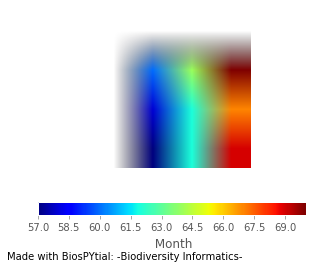

In [125]:
rast.display_field()

## Let's see if we can get data from the upper scales


In [126]:
c.upperCell.next()

< Cell-mexico_grid512 id = 43433 >

In [127]:
big_cell = c.upperCell.next().upperCell.next().upperCell.next()

In [128]:
rr = big_cell.getAssociatedRasterAreaData('Elevation')

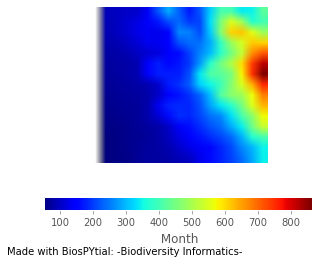

In [129]:
rr.display_field()

In [130]:
from traversals import strategies as st

In [ ]:
cells = list(selection_of_cells)

In [ ]:
tii = st.getEnvironmentalCovariatesFromListOfCells(cells)

In [30]:
tii[['MinTemperature_mean','MeanTemperature_mean','MaxTemperature_mean']]

,MinTemperature_mean,MeanTemperature_mean,MaxTemperature_mean
0,N.A.,N.A.,15.2669
1,29.875,23.6944,29.8986
2,23.2861,14.8194,23.2328
3,N.A.,N.A.,30.0982
4,N.A.,N.A.,21.6241
5,N.A.,N.A.,16.3036
6,N.A.,N.A.,18.4509
7,N.A.,N.A.,19.1838
8,27.0556,18.4398,26.997
9,N.A.,N.A.,25.6769


### Benchmarking time for retrieval using explicit lists vs lazy-evaluation


In [ ]:
%time samples = list(sel)

In [ ]:
%time ocs2 = map(lambda c : list(c.has_occurrences),samples)

In [ ]:
ocs2_l = filter(lambda k : k != [] ,ocs2)

In [ ]:
len(ocs2_l)

In [ ]:
lll = reduce(lambda a,b : a+b,ocs2_l)

In [ ]:
lll

In [ ]:
lll == ccc

In [ ]:
sel = Mex4km.select(graph).where("_.id IN  %s "%str(c))

In [ ]:
def _try_levelnames_extraction(relationship):
    """
    Extracts the end node relationship name.
    for use with map functions.
    """
    try:
        a = relationship.start_node()['levelname']
        return a
    except:
        return None
    
types = map(lambda r : map(lambda t : _try_levelnames_extraction(t),r),available_rels)

In [ ]:
types

In [ ]:
tt = tb.buildTreeNeo(samples[26])

In [ ]:
#For now not run
#big_tree = reduce(lambda a,b : a+b , trees)
import seaborn as sns

In [ ]:
t = trees[2]

In [ ]:
ll = map(lambda t : t.richness , trees)

In [ ]:
sns.distplot(ll)

In [ ]:
tl.plotTree(tt)

In [ ]:
import traversals.strategies as strg

In [ ]:
type(root)

In [ ]:
root = t.node

In [ ]:
a = strg.getPresencesForNode(root,trees)

In [ ]:
data_t = strg.getPresencesForListOfNodes([root],trees)

In [ ]:
data_t

# The model

In [ ]:
import pymc3 as pm

In [ ]:
-

In [ ]:
from pymc3 import find_MAP
map_estimate = find_MAP(model=model)
map_estimate

In [ ]:
import pandas as pd

In [ ]:
mapxy = pd.concat([data_t[['Longitude','Latitude']],pd.DataFrame({'map': map_estimate['latent_field']})],axis=1)

In [ ]:
gmapxy = tools.toGeoDataFrame(mapxy,xcoord_name='Longitude',ycoord_name='Latitude')

In [ ]:
fig, ax = plt.subplots(figsize=(14, 9));
gmapxy.plot(ax=ax,column='map')

## Prediction
The conditional method creates the conditional, or predictive, distribution over the latent function at arbitrary x∗x∗ input points, f(x∗)f(x∗). To construct the conditional distribution we write:

In [ ]:
minx = min(data_t.Longitude)
maxx = max(data_t.Longitude)
miny = min(data_t.Latitude)
maxy = max(data_t.Latitude)

In [ ]:
from external_plugins.spystats.spystats import tools

In [ ]:
grid = tools.createGrid(grid_sizex=10,grid_sizey=10,minx=minx,miny=miny,maxx=maxx,maxy=maxy)

In [ ]:
gp.predict(grid[['Lon','Lat']])

In [ ]:
%time f_star = gp.conditional("f_star", X=grid[['Lon','Lat']])

In [ ]:
getdata = lambda tree : tree.associatedData.getEnvironmentalVariablesCells()

In [ ]:
ts[1].associatedData.getEnvironmentalVariablesCells()

In [ ]:
list(choices)

In [ ]:
n